In [1]:
# importing libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import string

from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore") 

In [2]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score 
from scikitplot.metrics import plot_roc
import scikitplot as sklpt
import time
from sklearn import metrics
import pickle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading the reviews file
reviews = pd.read_csv("/content/drive/MyDrive/capstone/sample30.csv" , encoding='latin-1')
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
#reading the description file
desc = pd.read_csv("/content/drive/MyDrive/capstone/Data+Attribute+Description.csv" , encoding='latin-1')

In [7]:
desc.head(20)

,Attribute,Attribute Description
0,id,Uniques identity number to identify each uniqu...
1,brand,Name of the brand of the product to which user...
2,categories,Category of the product like household essenti...
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added re...
5,reviews_date,Date on which the review has been added by the...
6,reviews_didPurchase,Whether a particular user has purchased the pr...
7,reviews_doRecommend,Whether a particular user has recommended the ...
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


#### We will be using the user sentiment and reviews_rating to determine which products are preferred by which type of customers

In [8]:
#understanding the reviews data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

#### We see a lot of null / missing data

In [9]:
reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

###Understanding user sentiment data

In [10]:
reviews["user_sentiment"].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [11]:
#viewing the 1 record with missing user_sentiment
reviews[reviews["user_sentiment"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


In [12]:
#dropping the 1 record with missing user_sentiment
reviews=reviews[~reviews["user_sentiment"].isnull()]

In [13]:
#checking for null entries again
reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14067
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28070
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
dtype: int64

### Understanding the distribution of the ratings

In [14]:
reviews["reviews_rating"].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

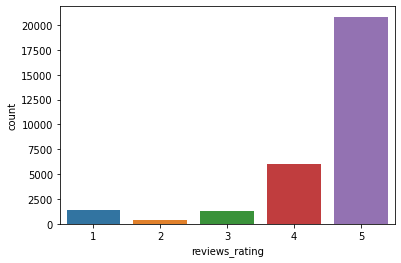

In [15]:
sns.countplot(x="reviews_rating",data=reviews)
plt.show()


<Axes: xlabel='reviews_rating', ylabel='count'>

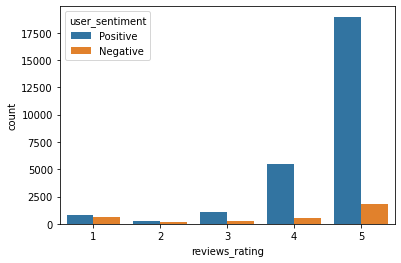

In [16]:
sns.countplot(x=reviews["reviews_rating"],hue=reviews["user_sentiment"],data=reviews)

### Data has class imbalance, skewed towards postive sentiment and 5 ratings. 
### We also observe that user sentiment is negative  for some of 4 & 5 ratings and postive for 1 to 3 ratings
### We will assign ratings 1 to 3 to negative sentiment and 4,5 to positive sentiment

In [17]:
print("Count of 1 to 3 rating but sentiment tagged as positive : ",reviews[(reviews["reviews_rating"]<=3)&(reviews["user_sentiment"]=="Positive")].id.count())
print("Count of 4 & 5 rating but sentiment tagged as negative : ",reviews[(reviews["reviews_rating"]>=4)&(reviews["user_sentiment"]=="Negative")].id.count())

Count of 1 to 3 rating but sentiment tagged as positive :  2192
Count of 4 & 5 rating but sentiment tagged as negative :  2410


In [18]:
reviews.loc[(reviews["reviews_rating"]<=3)&(reviews["user_sentiment"]=="Positive"),"user_sentiment"]="Negative"

In [19]:
reviews.loc[(reviews["reviews_rating"]>=4)&(reviews["user_sentiment"]=="Negative"),"user_sentiment"]='Positive'


<Axes: xlabel='reviews_rating', ylabel='count'>

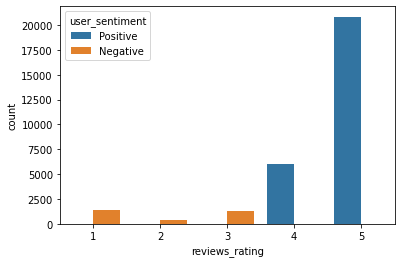

In [20]:
sns.countplot(x=reviews["reviews_rating"],hue=reviews["user_sentiment"],data=reviews)

In [21]:
#map the user_sentiment to numerical 1 or 0 for modelling
reviews['user_sentiment'] = reviews['user_sentiment'].map({'Positive':1,'Negative':0})

### Understanding Top Products & Brands by sentiments

In [22]:
#Top 5 Manufacturer with +ve reviews
reviews[reviews["user_sentiment"]==1].groupby("manufacturer").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
manufacturer,,
Clorox,40945,8448
Test,13271,2883
AmazonUs/CLOO7,9806,2009
Walt Disney,5202,1092
L'oreal Paris,4265,972


In [23]:
#Top 5 Manufacturer with -ve reviews
reviews[reviews["user_sentiment"]==0].groupby("manufacturer").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
manufacturer,,
120,5,0
Physicians Formula,5,0
Orajel,5,0
P&G,108,0
PHASE FOUR,1,0


In [24]:
#Top 5 Categories with +ve reviews
reviews[reviews["user_sentiment"]==1].groupby("categories").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
categories,,
"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",40940,8447
"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",13271,2883
"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",9806,2009
"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",5202,1092
"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",4134,944


In [25]:
#Top 5 Categories with -ve reviews
reviews[reviews["user_sentiment"]==0].groupby("categories").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
categories,,
"Auto & Tires,Motorcycle and ATV,Motorcycle,Motorcycle Parts,Motorcycle Tires,Cruiser,Tire Tubes",3,0
"Personal Care,Bath, Shower & Soap,Bar Soap,Bath & Body,Body Treatments,Beauty,Moisturizers,Body Butter",9,0
"Movies, Music & Books,Music,R&b,Jazz,Electronic & Dance,Pop,See More Genres,Music on CD or Vinyl,Pop Music on CD or Vinyl,Pop Rock Music on CD or Vinyl,Folk,Progressive Rock,Modern Postbebop,Dance Pop,Adult Alternative,Pop Rock",3,0
"Movies, Music & Books,Music,Rock,Music on CD or Vinyl,Pop Music on CD or Vinyl,Pop Rock Music on CD or Vinyl,Vocal Pop,Pop,Pop Rock",10,0
"Movies, Music & Books,Ways To Shop Entertainment,Movie & Tv Box Sets,Movies,Horror,Movies & TV Shows,All Horror,Movies & Tv On Blu-Ray,Movies & TV,Blu-ray,Action & Adventure,Movies & Music,Holiday Shop",83,0


In [26]:
#Top 5 Brands with -ve reviews
reviews[reviews["user_sentiment"]==1].groupby("brand").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
brand,,
Clorox,50751,10457
Warner Home Video,13271,2883
Disney,5481,1149
L'oreal Paris,4134,944
Burt's Bees,3981,822


In [27]:
#Top 5 Brands with -ve reviews
reviews[reviews["user_sentiment"]==0].groupby("brand").sum().sort_values(by="user_sentiment",ascending=False).head(5)

,reviews_rating,user_sentiment
brand,,
ANCHOR BAY,3,0
Queen Helene,9,0
Physician's Formula,5,0
Pioneer,5,0
Plano,2,0


In [28]:
def number_to_text(doc):
  doc=re.sub("\\d","None",doc)
  return doc

In [29]:
reviews["reviews_title"] = reviews["reviews_title"].fillna('')

In [30]:
reviews["reviews_title"]=reviews["reviews_title"].apply(lambda x:number_to_text(x))

In [31]:
#combining Reviews Title & review text
reviews["reviews_combined"]=reviews["reviews_title"]+" "+reviews["reviews_text"]

### Text modelling

In [41]:
#cleaning the reviews data
def text_processing(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]","",text)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [42]:
reviews_processed=reviews[['id','name','reviews_rating','reviews_combined','user_sentiment']]

In [43]:
reviews_processed['reviews_text_processed']=reviews_processed['reviews_combined'].apply(lambda x:text_processing(x))

In [44]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [45]:
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [46]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for x, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [47]:
reviews_processed["reviews_text_cleaned"] = reviews_processed["reviews_text_processed"].apply(lambda x: lemma_text(x))

In [48]:
reviews_processed

,id,name,reviews_rating,reviews_combined,user_sentiment,reviews_text_processed,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,Just Awesome i love this album. it's very good...,1,just awesome i love this album. it's very good...,awesome love hip hop side current pop listen e...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good Good flavor. This review was collected as...,1,good good flavor. this review was collected as...,good good review collect part
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good Good flavor.,1,good good flavor.,good good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,Disappointed I read through the reviews on her...,0,disappointed i read through the reviews on her...,disappoint read review look buy one couple ult...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,Irritation My husband bought this gel for us. ...,0,irritation my husband bought this gel for us. ...,irritation husband buy gel gel cause irritatio...
...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,Softness!! I got this conditioner with Influen...,1,softness!! i got this conditioner with influen...,get conditioner influenster try im love oily h...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,"I love it I love it , I received this for revi...",1,"i love it i love it , i received this for revi...",love love receive review purpose influenster l...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,Hair is so smooth after use First of all I lov...,1,hair is so smooth after use first of all i lov...,hair smooth use first love smell wash hair smo...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,Perfect for my oily hair! I received this thro...,1,perfect for my oily hair! i received this thro...,perfect oily receive influenster never go back...


In [49]:
def getCommonWords(reviews, number):
    # modify review column into a list of words, and set each to lowercase
    modified_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # remove punctuation from reviews
    modified_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in modified_reviews]


    # remove any empty strings that were created by this process
    modified_reviews = [review for review in modified_reviews if review]

    return Counter(modified_reviews).most_common(number)

In [50]:
positive_reviews = reviews_processed[reviews_processed['user_sentiment']==1]
getCommonWords(positive_reviews['reviews_text_cleaned'],10)

[('great', 12721),
 ('love', 12115),
 ('use', 10542),
 ('review', 8733),
 ('part', 8685),
 ('collect', 8129),
 ('product', 7698),
 ('movie', 7058),
 ('clean', 6763),
 ('wipe', 6423)]

In [51]:
negative_reviews = reviews_processed[reviews_processed['user_sentiment']==0]
getCommonWords(negative_reviews['reviews_text_cleaned'],10)

[('use', 1692),
 ('product', 1477),
 ('hair', 1270),
 ('new', 1251),
 ('like', 1062),
 ('old', 1044),
 ('formula', 1026),
 ('good', 903),
 ('movie', 759),
 ('back', 696)]

In [52]:
#function to collect the n-gram frequency of words
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    print("--1",sum_words)
    for word, x in vec.vocabulary_.items():
        #print(word)
        #print(idx)
        break
    words_freq = [(word, sum_words[0, x]) for word, x in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
#Print the top 10 words in the bigram frequency
common_words = get_top_n_ngram(positive_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 2 ... 2 1 1]]


,0,1
0,review collect,8107
1,clorox wipe,2171
2,great movie,1326
3,great product,1255
4,love clorox,1122
5,use clorox,1041
6,love use,983
7,easy use,966
8,love love,805
9,good movie,692


In [54]:
X = reviews_processed['reviews_text_cleaned']
y = reviews_processed['user_sentiment']

In [55]:
#using TF-IDF vectorizer using the parameters to get 100 features.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.9, min_df=7, binary=True, 
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(reviews_processed['reviews_text_cleaned'])

y= reviews_processed['user_sentiment']

In [56]:
print(tfidf_vectorizer.get_feature_names_out())

['action' 'awesome' 'bathroom' 'best' 'big' 'bring' 'buy' 'change' 'clean'
 'cleaning' 'clorox' 'clorox wipe' 'collect' 'color' 'come' 'conditioner'
 'convenient' 'day' 'definitely' 'disinfect' 'dry' 'easy' 'easy use' 'end'
 'enjoy' 'especially' 'excellent' 'family' 'fan' 'favorite' 'feel'
 'formula' 'free' 'fresh' 'funny' 'germ' 'godzilla' 'good' 'good movie'
 'great' 'great movie' 'great product' 'hair' 'help' 'home' 'house' 'job'
 'kid' 'kitchen' 'know' 'leave' 'like' 'lip' 'little' 'long' 'look' 'lot'
 'love' 'love clorox' 'love love' 'love use' 'make' 'mess' 'movie'
 'movie great' 'need' 'new' 'nice' 'old' 'perfect' 'price' 'product'
 'product use' 'purchase' 'quick' 'really' 'receive' 'recommend' 'review'
 'review collect' 'say' 'scent' 'shampoo' 'skin' 'smell' 'soft' 'thing'
 'think' 'time' 'try' 'use' 'use clorox' 'use product' 'want' 'watch'
 'way' 'wipe' 'work' 'worth' 'year']


In [57]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=50, test_size=0.3)

In [58]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 18815, 0: 2184})
After Counter({1: 18815, 0: 18815})


###Buidling the model

In [59]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
       # sklpt.metrics.plot_roc_curve(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))

In [61]:
# Build the Logistic Regression model.
%time
logistic_reg = LogisticRegression(random_state=50, max_iter=100,solver='liblinear', class_weight="balanced")
lr_modelbuilder = ModelBuilder(logistic_reg, X_train, X_test, y_train, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs




******************************
Accuracy is : 77.6%
Precision is : 97.0%
Recall is : 77.3%
F1 Score is : 86.1%
Roc-Auc Score is:85.8%
******************************


              precision    recall  f1-score   support

           0       0.30      0.80      0.43       965
           1       0.97      0.77      0.86      8035

    accuracy                           0.78      9000
   macro avg       0.63      0.79      0.65      9000
weighted avg       0.90      0.78      0.81      9000

******************************




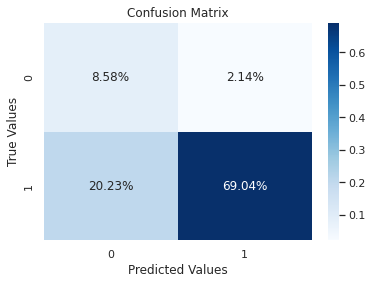

******************************




In [62]:
# Train and Predict the Test Labels
y_pred_class  = lr_modelbuilder.train_model()
lr_metrics = lr_modelbuilder.evaluate_model(y_pred_class)

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [64]:
dec_tree = DecisionTreeClassifier(random_state=50, criterion="gini", max_depth=10)

In [65]:
dec_tree_model = ModelBuilder(dec_tree, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 75.0%
Precision is : 96.4%
Recall is : 74.8%
F1 Score is : 84.3%
Roc-Auc Score is:80.5%
******************************


              precision    recall  f1-score   support

           0       0.27      0.77      0.40       965
           1       0.96      0.75      0.84      8035

    accuracy                           0.75      9000
   macro avg       0.62      0.76      0.62      9000
weighted avg       0.89      0.75      0.79      9000

******************************




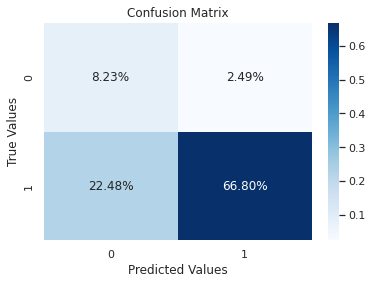

******************************




In [66]:
y_pred_class  = dec_tree_model.train_model()
dt_metrics = dec_tree_model.evaluate_model(y_pred_class)

In [67]:
rf = RandomForestClassifier(oob_score=True, random_state=50, criterion="gini")

In [68]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [69]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [70]:
%time
grid_search.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [71]:
rf_best = grid_search.best_estimator_
rf_best_model = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 77.4%
Precision is : 96.7%
Recall is : 77.3%
F1 Score is : 85.9%
Roc-Auc Score is:85.8%
******************************


              precision    recall  f1-score   support

           0       0.29      0.78      0.43       965
           1       0.97      0.77      0.86      8035

    accuracy                           0.77      9000
   macro avg       0.63      0.78      0.64      9000
weighted avg       0.89      0.77      0.81      9000

******************************




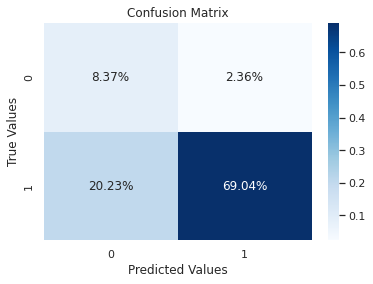

******************************




In [72]:
# Train and Predict the Test Labels
y_pred_class  = rf_best_model.train_model()
rf_metrics = rf_best_model.evaluate_model(y_pred_class)

In [73]:
import xgboost as xgb

In [74]:
xg_boost = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=50)
xg_model = ModelBuilder(xg_boost, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 85.7%
Precision is : 94.9%
Recall is : 88.8%
F1 Score is : 91.8%
Roc-Auc Score is:86.7%
******************************


              precision    recall  f1-score   support

           0       0.39      0.60      0.47       965
           1       0.95      0.89      0.92      8035

    accuracy                           0.86      9000
   macro avg       0.67      0.74      0.70      9000
weighted avg       0.89      0.86      0.87      9000

******************************




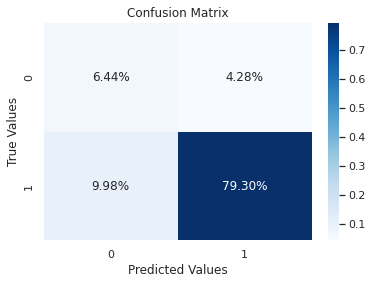

******************************




In [75]:
# Train and Predict the Test Labels
y_pred_class  = xg_model.train_model()
xg_metrics = xg_model.evaluate_model(y_pred_class)

###XGboost has the best performance

####We will save the models as pickle files

In [76]:
def save_object(obj, filename):
    filename = "pickle\\"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [77]:
save_object(xg_boost, 'sentiment-classification-xg-boost-model')

In [78]:
save_object(tfidf_vectorizer, 'tfidf-vectorizer')

In [79]:
save_object(reviews_processed, 'cleaned-data')

### Recommendation System

In [80]:
reco_df = reviews[["id", "name", "reviews_rating", "reviews_username"]]

In [81]:
#splitting the train and test
train, test = train_test_split(reco_df, test_size=0.3, random_state=50)

###Not filling Na values as we plan to use adjusted cosine

In [82]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
df_pivot = pd.pivot_table(train,index="reviews_username", columns = "id", values = "reviews_rating")

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Creating a dummy train & test dataset

In [83]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [84]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train["reviews_rating"] = dummy_train["reviews_rating"].apply(lambda x: 0 if x>=1 else 1)

In [85]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index="reviews_username", columns = "id", values = "reviews_rating").fillna(1)

In [86]:
dummy_train.shape

(18276, 255)

###Normalising the rating of the movie for each user around 0 mean

In [87]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [88]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##User similarity matrix
###Using adjusted cosine similarity

In [89]:
from sklearn.metrics.pairwise import pairwise_distances

In [90]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##Prediction User - User

####Ignoring the correlation for values less than 0. 

In [91]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

####Rating predicted by the user 

In [92]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.5       , ..., 0.        , 1.89466187,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [93]:
user_predicted_ratings.shape

(18276, 255)

###ignore the products rated by users by making it zero. For prediction, we are only interested in products not rated

In [94]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,0.0,2.5,4.257322,0.0,0.0,0.204124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.894662,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


###Finding the top 20 recommendation for the user

In [95]:
# Take the user ID as input.
user_input = input("Enter your user name : ")
print(user_input)

Enter your user name : 00sab00
00sab00


In [97]:
Top_20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
Top_20_recommendations

id
AVpfPaoqLJeJML435Xk9    40.615047
AVpfRTh1ilAPnD_xYic2    30.193714
AVpf0eb2LJeJML43EVSt    11.432378
AVpf3VOfilAPnD_xjpun    10.103311
AVpfM_ytilAPnD_xXIJb     7.573836
AVpe8gsILJeJML43y6Ed     7.064021
AVpfJcHuLJeJML433ZrY     6.698659
AVpfJP1C1cnluZ0-e3Xy     5.331323
AVpfD9xTLJeJML431ig2     4.665064
AVpfR5m0LJeJML436K3W     4.321495
AVpe31o71cnluZ0-YrSD     4.288370
AV1YGDqsGV-KLJ3adc-O     4.257322
AVpf5Z1zLJeJML43FpB-     3.976254
AVpf385g1cnluZ0-s0_t     3.495086
AVpf63aJLJeJML43F__Q     3.370388
AVpfov9TLJeJML43A7B0     3.319764
AVpfm8yiLJeJML43AYyu     2.964131
AVpfPnrU1cnluZ0-g9rL     2.816497
AVpfBrUZilAPnD_xTUly     2.790569
AVpfe3On1cnluZ0-lgn5     2.500000
Name: 00sab00, dtype: float64

In [98]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': Top_20_recommendations.index, 'similarity_score' : Top_20_recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,40.615047
2317,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,30.193714
3119,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),11.432378
3713,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,10.103311
9750,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,7.573836
9932,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",7.064021
10137,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),6.698659
10145,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5.331323
11582,AVpfD9xTLJeJML431ig2,There's Something About Mary (dvd),4.665064
11676,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,4.321495


####Evaluation User-User

In [99]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2054, 4)

In [100]:
# convert into the user-product matrix.
common_user_based_matrix = pd.pivot_table(common,index="reviews_username", columns = "id", values = "reviews_rating")
common_user_based_matrix.head()

id,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18266,18267,18268,18269,18270,18271,18272,18273,18274,18275
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
user_correlation_df["reviews_username"] = df_pivot.index
user_correlation_df.set_index("reviews_username",inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18266,18267,18268,18269,18270,18271,18272,18273,18274,18275
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [104]:
user_correlation_df_1.shape

(1720, 18276)

In [105]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.39777864, 0.39777864,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [106]:
dummy_test = common.copy()

dummy_test["value_column"] = dummy_test["reviews_rating"].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index="reviews_username", columns = "id", values = "reviews_rating").fillna(0)

In [107]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [108]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [109]:
common_ = pd.pivot_table(common,index="reviews_username", columns = "id", values = "reviews_rating")

In [110]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [111]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.334787472989909


###Item Based Recommendation

In [112]:
df_pivot = pd.pivot_table(train,
    index="id",
    columns="reviews_username",
    values="reviews_rating"
)

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zsazsa,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [114]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [115]:
item_correlation[item_correlation<0]=0

###Prediction - item-item

In [116]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03870907,
        0.        ],
       [0.        , 0.        , 0.01290918, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

###Filtering the rating only for the products not rated by the user for recommendation

In [117]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.020958,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
00sab00,0.0,0.0,0.000000,0.004180,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.012671,0.0,0.0,0.0,0.0,0.023471,0.0,0.0,0.038709,0.0
01impala,0.0,0.0,0.012909,0.000000,0.0,0.0,0.0,0.0,0.017546,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,0.021515,0.000000,0.0,0.0,0.0,0.0,0.029243,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
02deuce,0.0,0.0,0.017212,0.000000,0.0,0.0,0.0,0.0,0.023394,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


###Finding the top 20 recommendation for the user

In [118]:
# Take the user ID as input
user_input = input("Enter your user name : ")
print(user_input)

Enter your user name : 01impala
01impala


In [119]:
# Recommending the Top 20 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpf5olc1cnluZ0-tPrO    0.123746
AVpfBU2S1cnluZ0-cJsO    0.046433
AVpf4WWN1cnluZ0-s7Wj    0.042554
AVpe8q4T1cnluZ0-afct    0.038791
AVpfR5m0LJeJML436K3W    0.029777
AVpe41TqilAPnD_xQH3d    0.025203
AVpfOmKwLJeJML435GM7    0.025034
AV1Yn94nvKc47QAVgtst    0.017546
AVpfJcHuLJeJML433ZrY    0.013132
AV16khLE-jtxr-f38VFn    0.012909
AVpf7I3i1cnluZ0-tnL6    0.011646
AVpfbraG1cnluZ0-kqnn    0.011388
AVpfN6Z71cnluZ0-gZmO    0.008967
AVpfD9xTLJeJML431ig2    0.007217
AVpfKOYiilAPnD_xWOFw    0.007178
AVpfov9TLJeJML43A7B0    0.005628
AVpe5JOgilAPnD_xQPfE    0.005149
AVpfm8yiLJeJML43AYyu    0.005109
AVpfBO2vLJeJML430mGh    0.004291
AVpfpM2yilAPnD_xfmDG    0.004170
Name: 01impala, dtype: float64

In [120]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,0.123746
126,AVpfBU2S1cnluZ0-cJsO,Power Crunch Protein Energy Bar Peanut Butter ...,0.046433
152,AVpf4WWN1cnluZ0-s7Wj,Chips Deluxe Soft 'n Chewy Cookies,0.042554
155,AVpe8q4T1cnluZ0-afct,"Newman's Own Organics Licorice Twist, Black 5oz",0.038791
159,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,0.029777
310,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.025203
845,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,0.025034
1103,AV1Yn94nvKc47QAVgtst,CeraVe SA Renewing Cream,0.017546
1118,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.013132
1126,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0.012909


###Evaluation - item-item

In [121]:
common =  test[test.id.isin(train.id)]

In [122]:
common_item_based_matrix = common.pivot_table(index="id", columns="reviews_username", values="reviews_rating")

In [123]:
item_correlation_df = pd.DataFrame(item_correlation)

In [124]:
item_correlation_df["id"] = df_subtracted.index
item_correlation_df.set_index("id",inplace=True)

In [125]:
list_name = common.id.tolist()

In [126]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [127]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [128]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09085765, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00474932, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00474932],
       ...,
       [0.02885204, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02885204],
       [0.        , 0.00109754, 0.00137193, ..., 0.00137193, 0.00137193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
dummy_test = common.copy()
dummy_test["reviews_rating"] = dummy_test["reviews_rating"].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index="id", columns="reviews_username", values="reviews_rating").fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [130]:
common_ = pd.pivot_table(common,index="id", columns="reviews_username", values="reviews_rating")

In [131]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [132]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [133]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.572540646955146


##RMSE of user based recommendation system is lower than Item based. 
##Hence we go ahead with user based recommendation system

In [134]:
# saving the correlation matrix of user based recommender 
save_object(user_final_rating, "user_final_rating")

###Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model

In [137]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = reviews_processed[reviews_processed.id.isin(recommendations)]
        #temp["reviews_text_cleaned"] = temp["reviews_text"].apply(lambda x: self.preprocess_text(x))
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_text_cleaned"].values.astype(str))
        temp["predicted_sentiment"]= xg_boost.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [138]:
#testing the above fuction using one of the users that's trained on.
get_sentiment_recommendations("01impala")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
19,Voortman Sugar Free Fudge Chocolate Chip Cookies,4,4,4,100.00
12,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,1,1,100.00
7,"Finish Gelpacs Dishwasher Detergent, Orange Sc...",8,7,8,87.50
17,Switchmas (dvd),7,6,7,85.71
13,"Pleasant Hearth 1,800 sq ft Wood Burning Stove...",53,45,53,84.91


In [139]:
#testing the above fuction on an unknown or new user
get_sentiment_recommendations("unknownblah")

User name unknownblah doesn't exist
